# Zalando data import


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [2]:
print('Fashion MNIST Dataset Shape:')
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))



Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [3]:
len(x_train)

60000

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

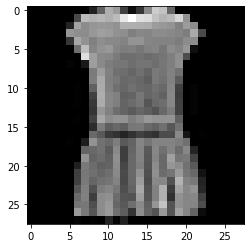

In [5]:
# pick a sample to plot
sample = 3
image = x_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

**Visualizing  the example data and their labels**


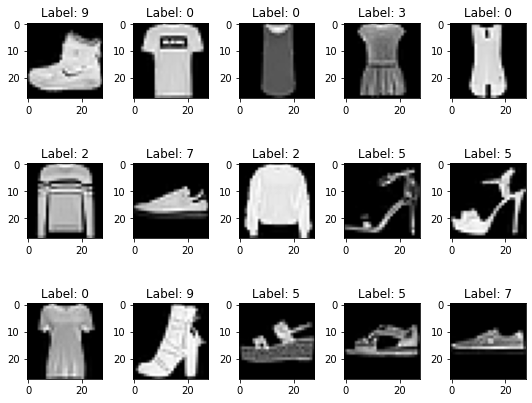

In [6]:
# specify the number of rows and columns you want to see
num_row = 3
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = x_train[:num]
labels = y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

Model definition

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100))
model.add(keras.layers.Dense(80))
model.add(keras.layers.Dense(60))
model.add(keras.layers.Dense(40))
model.add(keras.layers.Dense(20))
model.add(keras.layers.Dense(10))
model.add(keras.layers.Dense(3))
model.add(keras.layers.Dense(3))
model.add(keras.layers.Dense(3))
model.add(keras.layers.Dense(3))
model.add(keras.layers.Dense(3))
model.add(keras.layers.Dense(10))

Model fertigstellen

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


Modell mit Daten Trainieren

In [9]:
training = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 1.9080 - accuracy: 0.6033
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8136 - accuracy: 0.7203
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7261 - accuracy: 0.7427
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6855 - accuracy: 0.7544
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6669 - accuracy: 0.7637
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6482 - accuracy: 0.7711
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6362 - accuracy: 0.7773
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6259 - accuracy: 0.7810
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6167 - accuracy: 0.7845
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6

Trainingsforschritt anzeigen

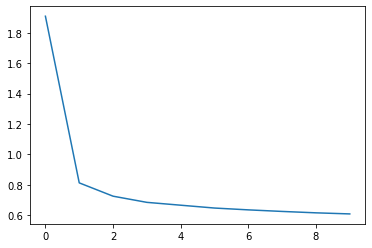

In [10]:
plt.plot(training.history['loss'])
plt.show()

Hands on: interpretiere deinen plot hat das Modell uas den Daten gelernt?

In [11]:
zalando_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##Welches Label hat den höchsten Wert?

In [12]:
highestvalue = np.argmax(model.predict(x_test[[0]]))
zalando_names[highestvalue]

1/1 [==============================] - 0s 154ms/step


'Ankle boot'


## HANDS ON: Überprüfe durch das Bild, ob die Prediction korrekt war

In [13]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.6383 - accuracy: 0.7760 - 818ms/epoch - 3ms/step

Test accuracy: 0.7760000228881836
